>#                              **2) Evaluation Project _Avocado Project**




###                                         **By: AFSANA BEGAM**
###                                         **Batch: DS2303**

================================================================================================================

## **Problem Statement:**
Avocado is a bright green fruit with a large pit and dark leathery skin, consumed by people of the United States.



This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
* Some relevant columns in the dataset:

 * Date - The date of the observation
 * AveragePrice - the average price of a single avocado
 * type - conventional or organic
 * year - the year
 * Region - the city or region of the observation
 * Total Volume - Total number of avocados sold
 * 4046 - Total number of avocados with PLU 4046 sold
 * 4225 - Total number of avocados with PLU 4225 sold
 * 4770 - Total number of avocados with PLU 4770 sold

* Inspiration /Label

 * The dataset can be seen in two angles to find the region and find the average price .

 * Task: One of Classification and other of Regression

 * Do both tasks in the same .ipynb file and submit at single file.

<b> To download the dataset, use the link given below.</b>

Downlaod Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

## **Importing required library** ▶

In [ ]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

### ***Data Collection:***

In [ ]:
#Data Collection from csv file
df = pd.read_csv("/content/avocado.csv")

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.shape

No of Rows: 18249
No of Columns: 14


(18249, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### **Data Integrity Check:**

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [ ]:
df.duplicated().sum()  # This will check the duplicate data for all columns

0

* ***Take-away:***
  Dataset does not contain any duplicate entry. So we will go for further process

### **Missing value check:**

In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

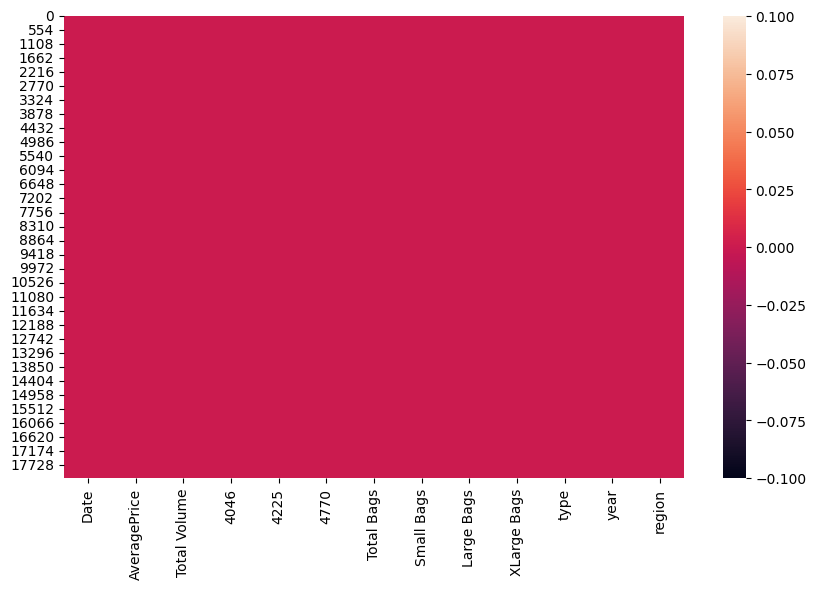

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

* ***Take-away:*** There is no missing values in dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* ***Take-away:***

 * There are 13 features in data.
 * Region has object datatype.
 * Date by default  is object data type which need to change to datetime datatype.
 * Other variables are float & int datatypes.

In [ ]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

### **Statistical Analysis:**

In [ ]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.406,0.403,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013,3453545.355,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.425,1264989.082,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568,1204120.401,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.736,107464.068,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202,986242.399,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.687,746178.515,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088,243965.965,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.427,17692.895,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.148,0.940,2015.00,2015.00,2016.00,2017.00,2018.00


* ***Take-away:***

  * We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
  * For most of columns have minimum value of zero.
  * Almost in all columns value of mean is greater than median. Data is right skewed.
  * For most of columns value of std. deviation is greater than mean i.e. data is spread.

<Axes: >

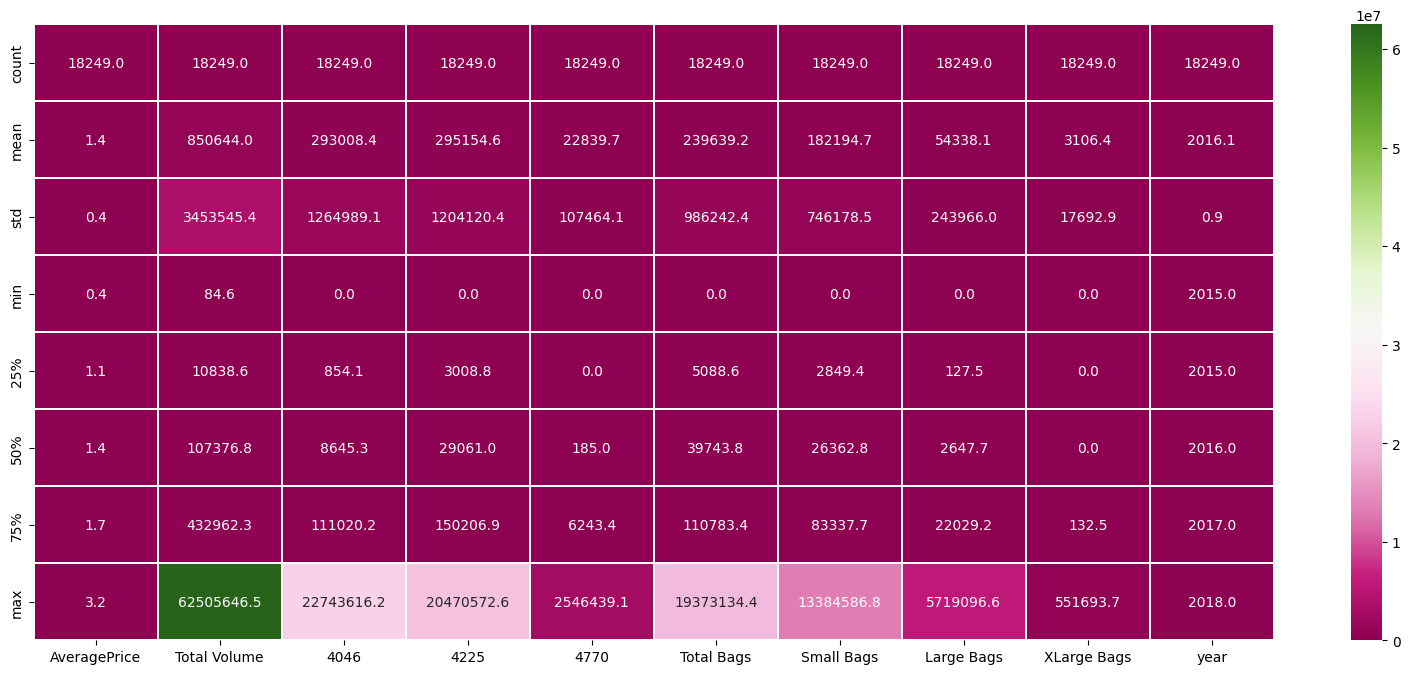

In [ ]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [ ]:
#Statistical Info
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


* Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

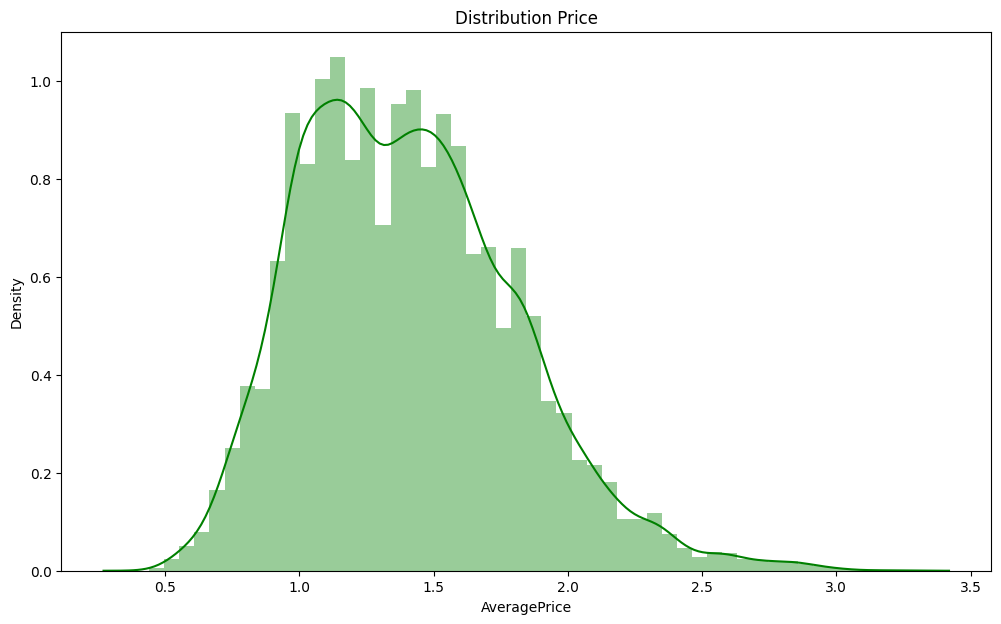

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='g')

* Most of cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [ ]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

* There are two types of avocado - **conventional** and ***organic***

In [ ]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [ ]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [ ]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.653999-1.158040)/1.158040)*100,"%")

Percentage difference in price of avacado : 42.827449829021454 %


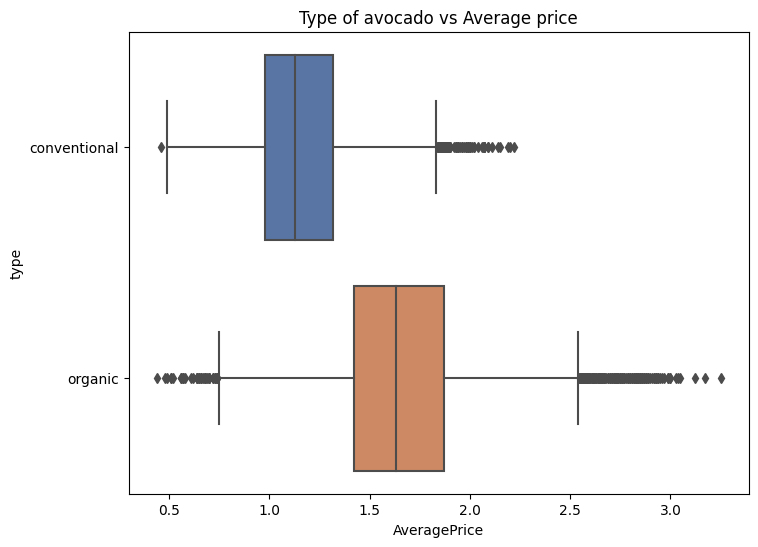

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Type of avocado vs Average price')
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'deep')
plt.show()

* ***Take-away:***

  * Oraganic Avocado is almost 43% more costlier than Conventional Avacado.
  * We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
  * This is obvious that, production of organic avocado is expensive, time taking process demanding much effort & patience.People who are health cautious and quality aware will pay more price for it.

<b> Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sale of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.

In [ ]:
gb= df.groupby('type')['Total Volume'].mean()
keys=['Conventional','Organic']

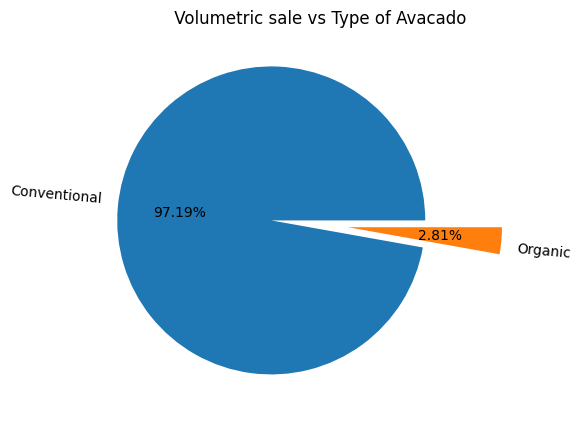

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=gb,labels=keys,autopct='%.2f%%' , explode=[0.3,0.2], rotatelabels= True)
plt.title(' Volumetric sale vs Type of Avacado')
plt.show()

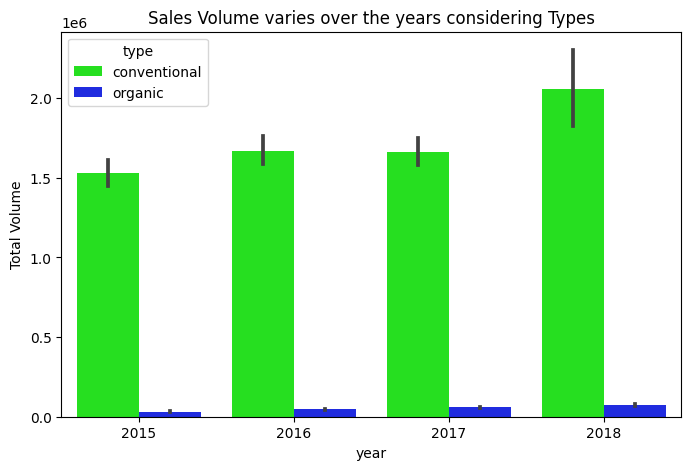

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='hsv',ci=68)
plt.title('Sales Volume varies over the years considering Types')
plt.show()

* ***Take_away:***

  * The sell of organic avacodo is less than 3 %.
  * **Conventional Avacado are in more demand**. Barplot confirms the same thing in yearwise sales volume.

**The Average price varies over year  , lets dive to get some more insight over it---**

In [ ]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.text_gradient(cmap='summer')

In [ ]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

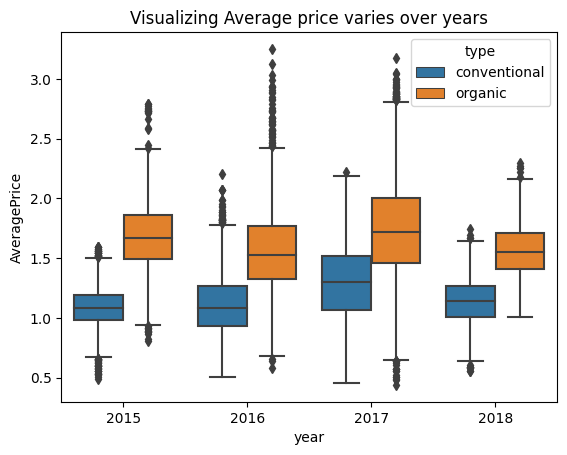

In [ ]:
sns.boxplot(x="year", y="AveragePrice", hue= "type" ,data=df)
plt.title('Visualizing Average price varies over years')
plt.show()

* ***Take-away:***

  * Oraganic Avocado is 40-50% costlier than conventional avacado.
  * The average price was high in 2017 compared to other years,might be due to inflation,shortage or various production expenditures.

**Price hike over the years is expected but what about demand over the years? Let us check market demand through volume sale  next --**

In [ ]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

* ***Take-away:***

  * Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or lack of supply chain.
  * 30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
  * There is also growth in demand of conventional type avocado year-wise.
  * XLarge Bags sales increase rapidly in 2017 compare to 2015.
  * If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop  played role here.
  * People choosing small bags of organic avocado over large.Price factor playing here.

In [ ]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


### ***Exploratory Data Analysis(EDA) & Visualization:***

In [ ]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8489,2018-01-07,1.13,98540.22,2940.63,76192.61,42.63,19364.35,8633.09,10707.93,23.33,conventional,2018,Albany
8363,2017-02-26,0.99,37007797.69,13173668.36,11398142.68,896761.77,11539224.88,8945888.88,2405733.76,187602.24,conventional,2017,TotalUS
586,2015-09-20,0.77,1155212.67,606586.38,425539.41,10973.08,112113.80,99272.95,12833.33,7.52,conventional,2015,DallasFtWorth
9336,2015-12-13,1.55,8563.97,18.24,434.18,251.75,7859.80,7848.99,10.81,0.00,organic,2015,Boston
3453,2016-07-31,1.15,673588.45,144730.95,178801.08,19083.49,330972.93,200378.09,129901.78,693.06,conventional,2016,Denver


In [ ]:
df2=df.copy()
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


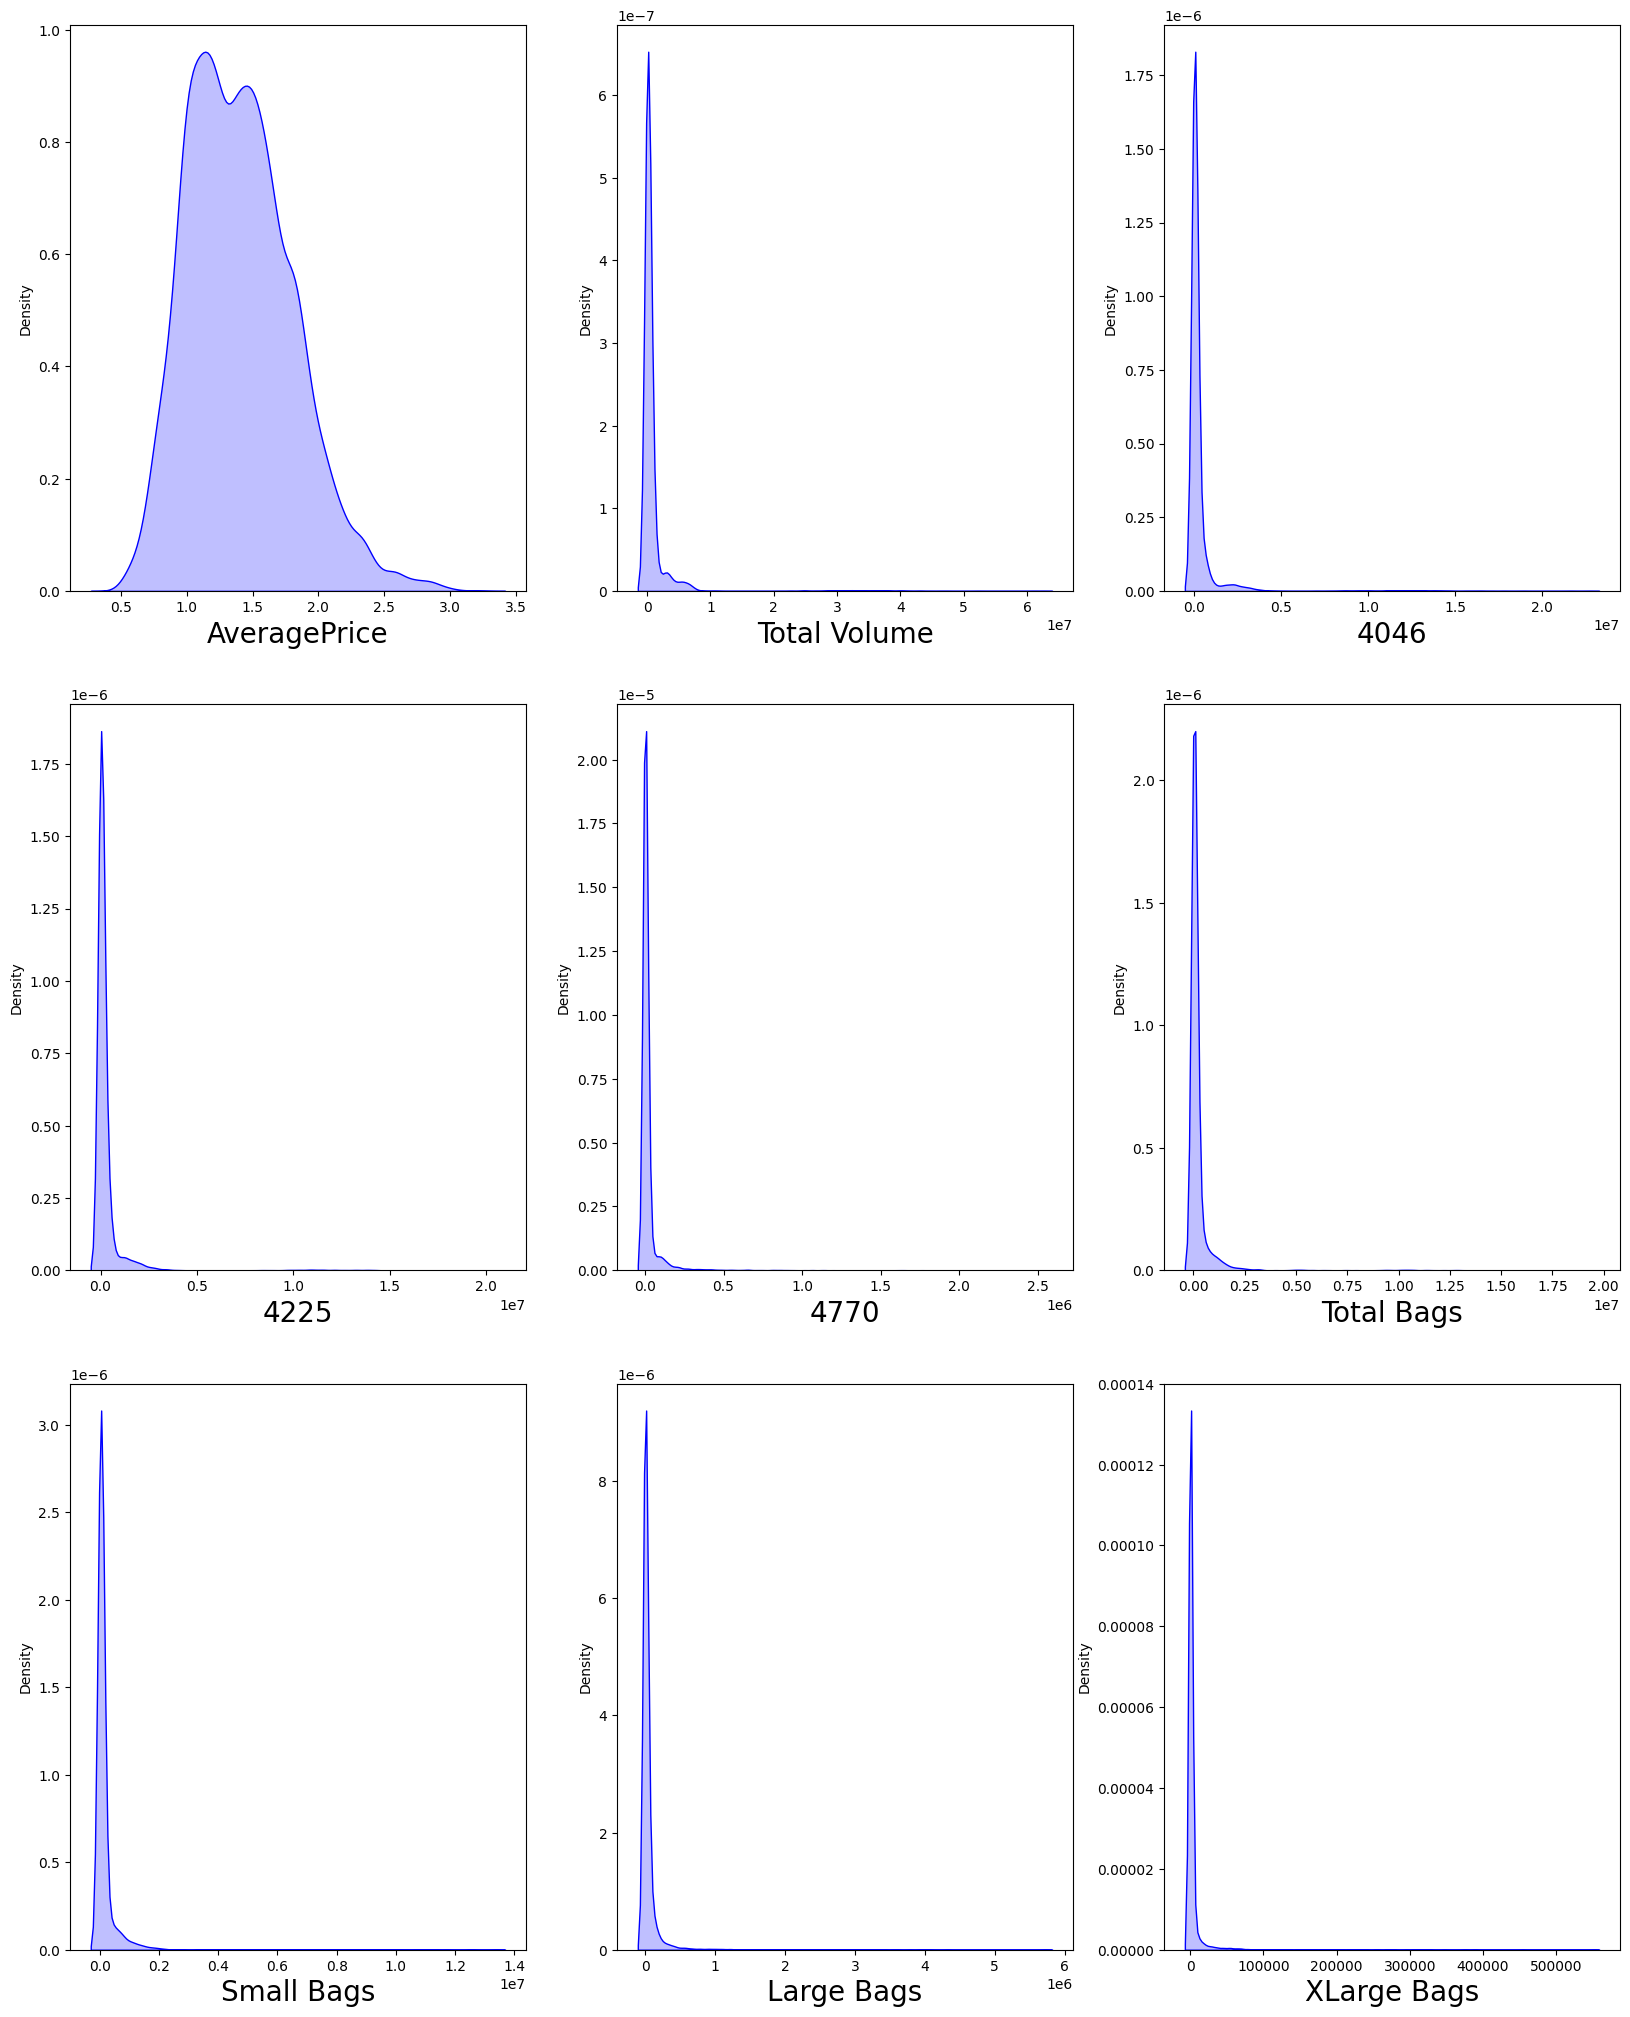

In [ ]:
#'Visualization of all the numeric features'
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* ***Take-away:***

  * We can see skewed data with presence of outliers with sharp peak.
  * Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

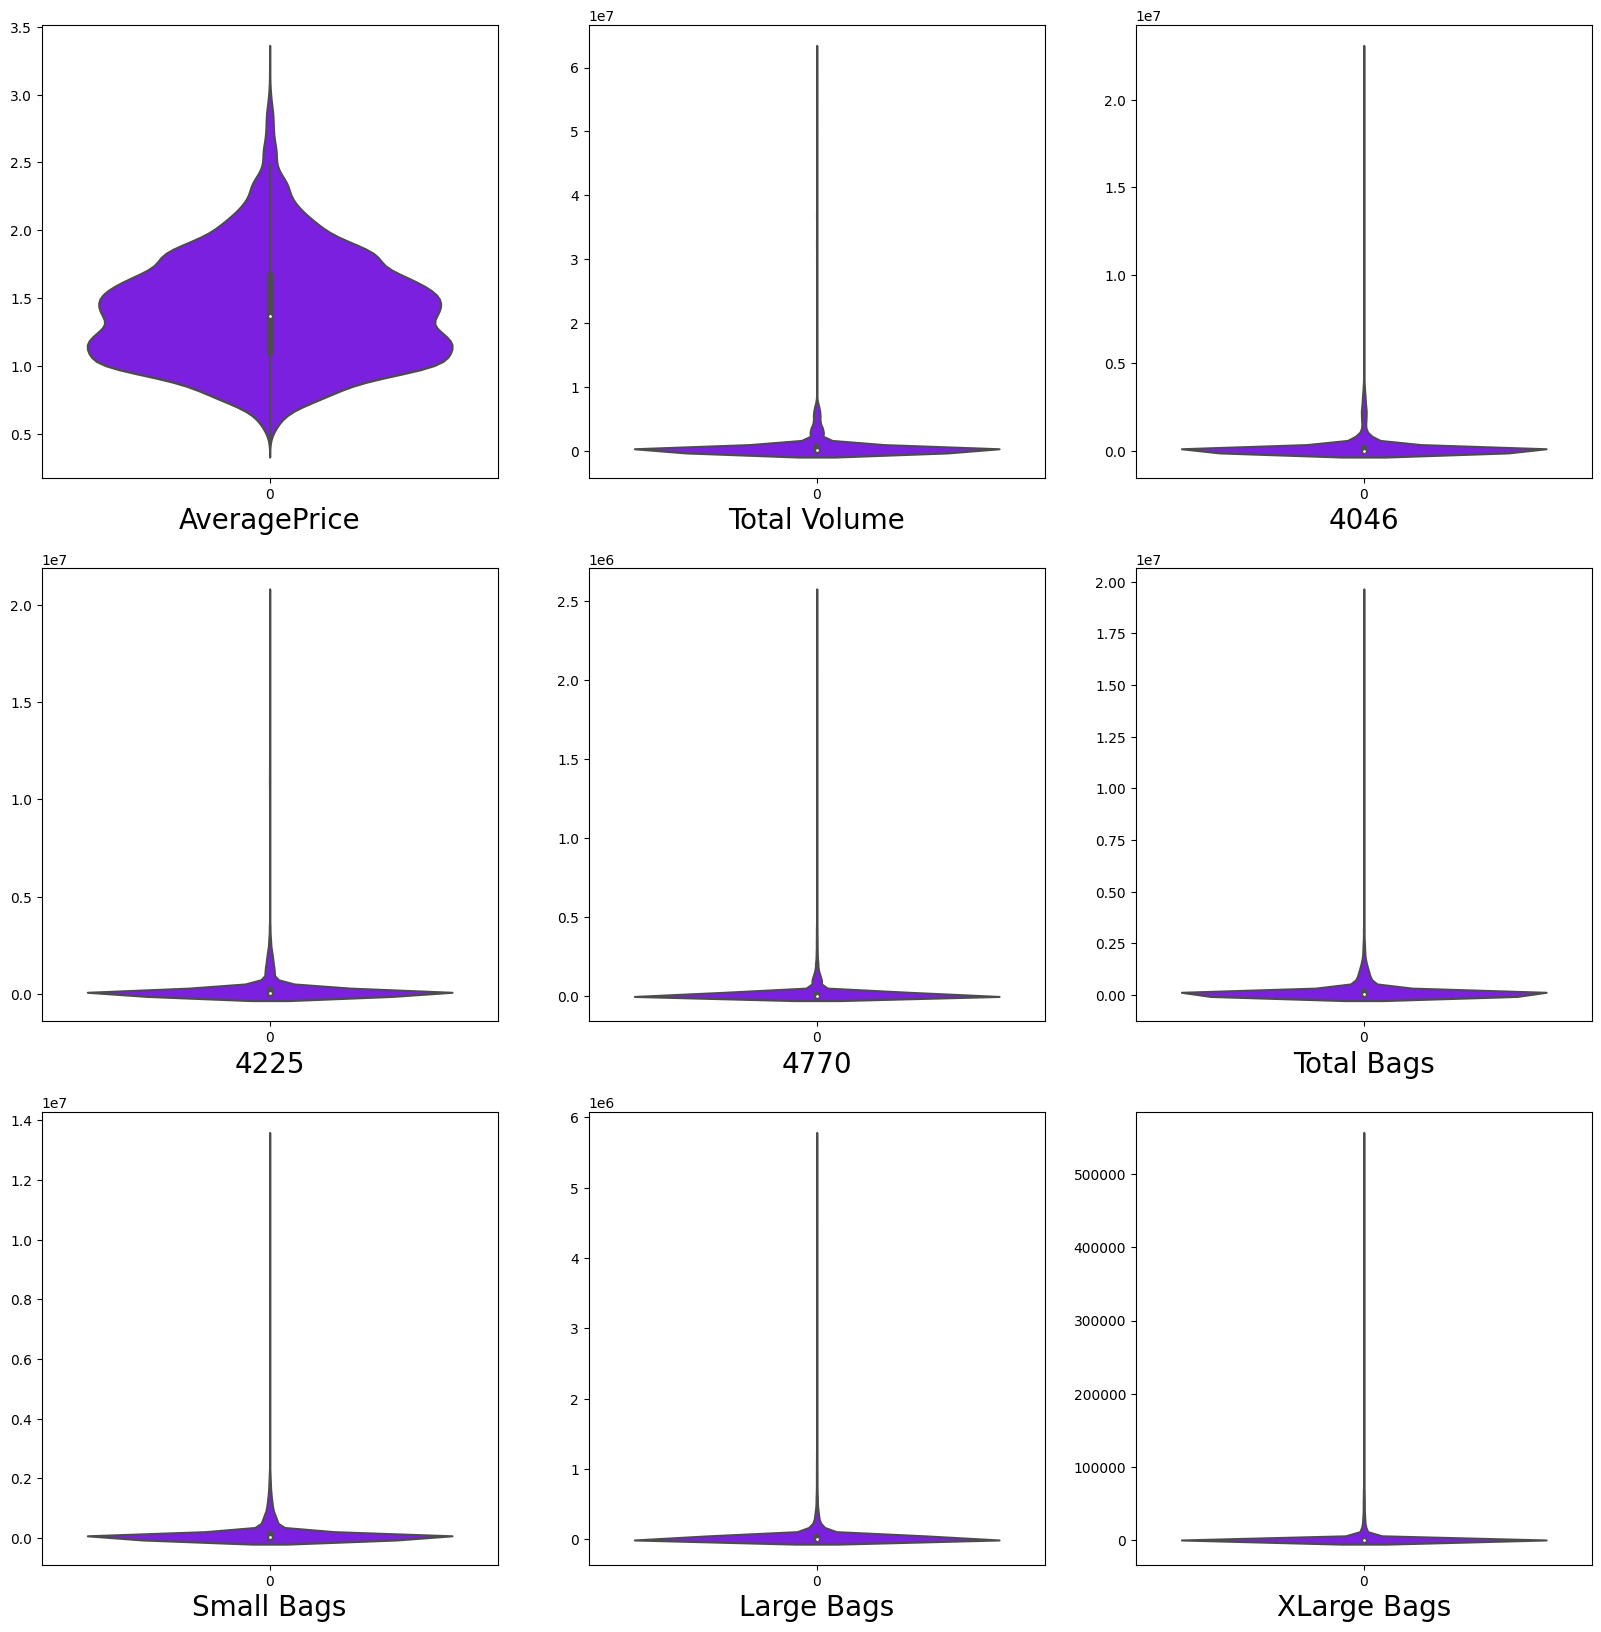

In [ ]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* **Take-away:**
    * For Majority Average price is in range of 1 to 1.5.
    * Rest of Violin plot show same story as distribution plot

**Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.**

For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

In [ ]:
#Again Data Collected from csv file
df = pd.read_csv("/content/avocado.csv")
# Copy of original dataframe
df3=df.copy()

In [ ]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year','Unnamed: 0'], inplace=True)
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [ ]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [ ]:
df3.drop(columns=['Day'],axis=1, inplace=True)
df3.drop(columns=['Date'],axis=1, inplace=True)
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


### **Uni-variate analysis of feature using date, months, year:**

In [ ]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

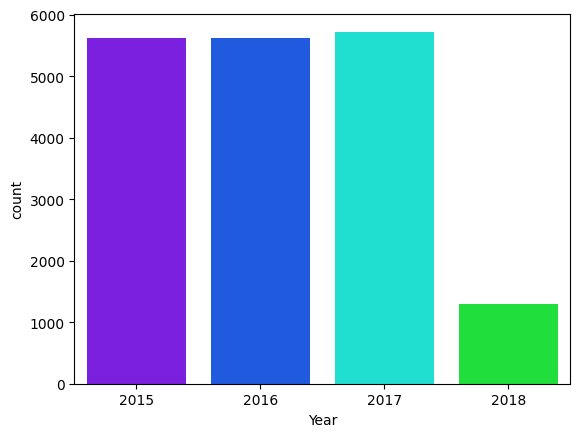

In [ ]:
sns.countplot(x='Year',data=df3)

* **Take-away**:
    * This dataset contain data from 2015 to 2018
    * Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

* **Approach:**
    * We want check Avg Price over each Month
    * First we will check Sale entries per Months
    * Next We will Avg Price over each month using Countplot
    * Finally we will try to bring insight over relation of sales entries to Avg price over same month.

**Checking Month-Wise sales entries-**

<Axes: xlabel='Month', ylabel='count'>

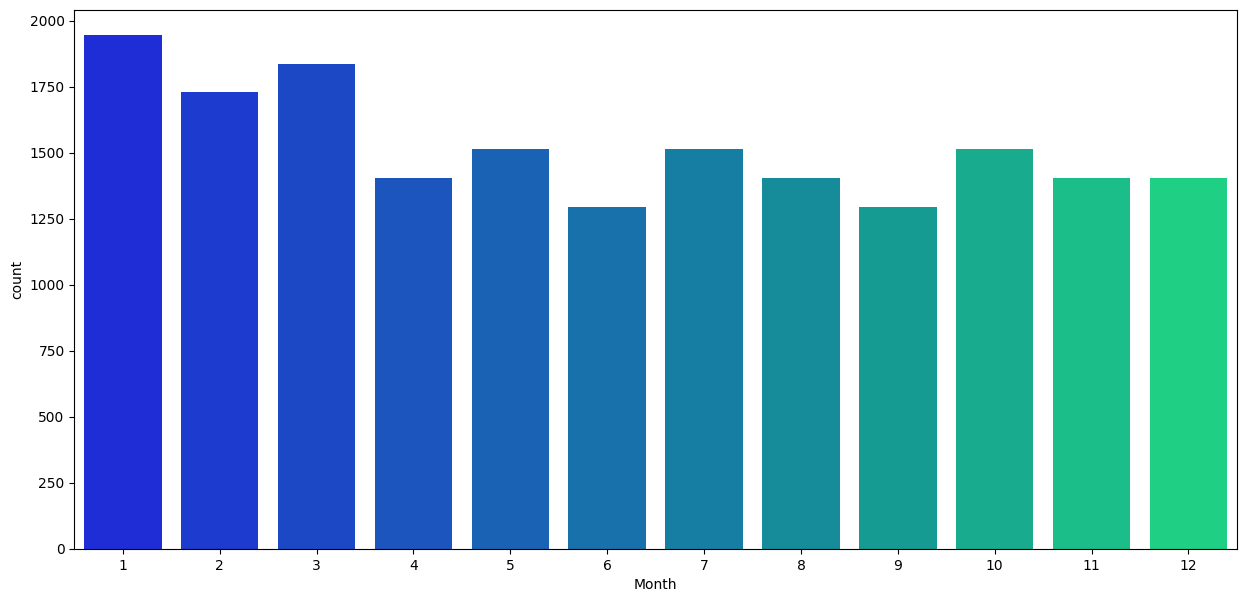

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="winter")

In [ ]:
df3['Month'].value_counts().max()

1944

In [ ]:
df3['Month'].value_counts().min()

1294

* **Take-away:**
    * Maximum sales lead comes in month of Jan, Feb, March
    * Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

**Checking Month-Wise Variation in Average Price--**

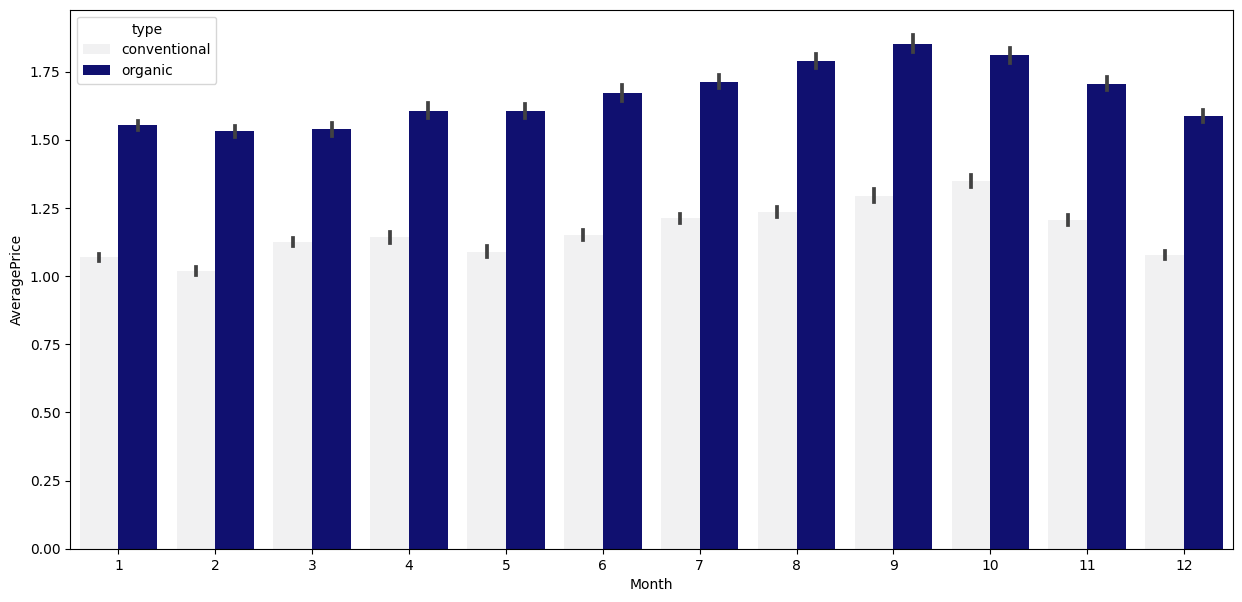

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice",color='navy' ,hue='type', data=df3)
plt.show()

In [ ]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 1000x1000 with 0 Axes>

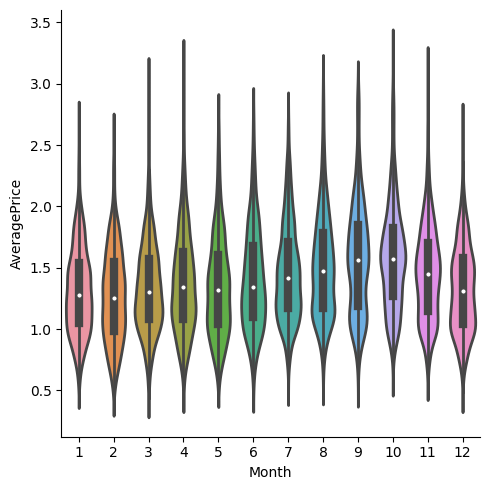

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

* **Take-away:**
    * In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
    * There is not much upheaval in Organic type Avacoda over year peroid.
    * We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

**But what causes such High demand in 1st quater of year ?**
According to Google it's : 'FLAVOR'.

Avocados are available year round like most agricultural commodities these days, but January through March is the best time of year for flavor . It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love.

* **Now we Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.**
    * In first sight we can see in period of Augest to October price high & in that same time period sales order are             minimum.
    * Opposite of it true in duration of Jan to March.
    * This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.
**In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price.**

* ***Till Now we have not explore region feature , Now we will see next--***

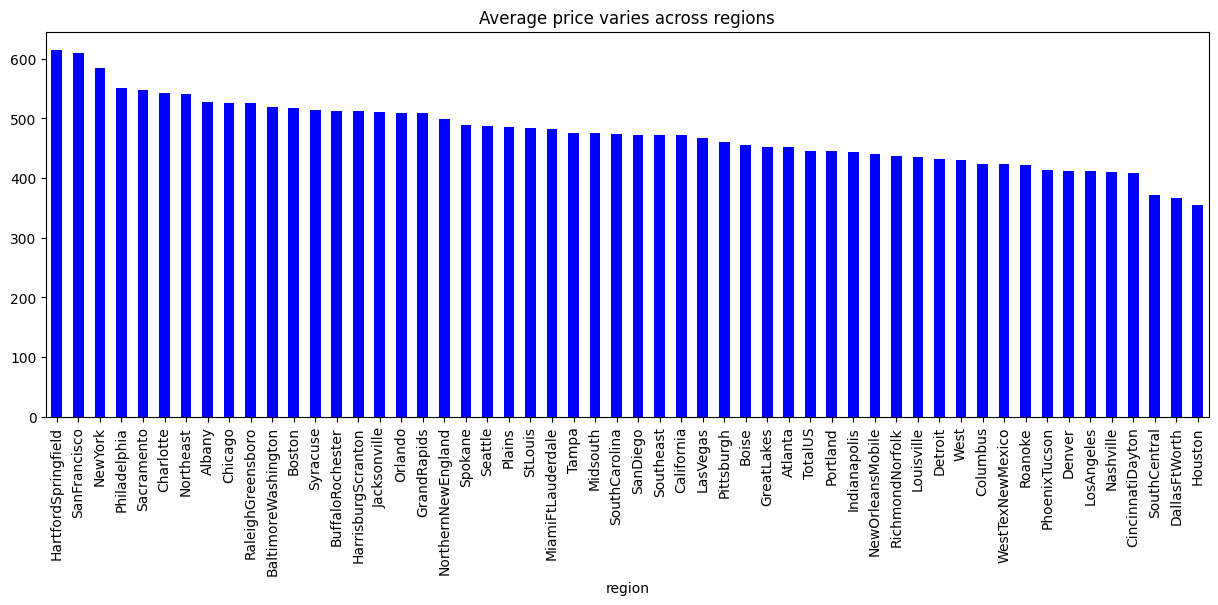

In [ ]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",cmap='winter',figsize=(15,5))
plt.title('Average price varies across regions')
plt.show()

* ***Take-away:***
AveragePrice varies with region. Price of avocado varies from one region to another- with HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

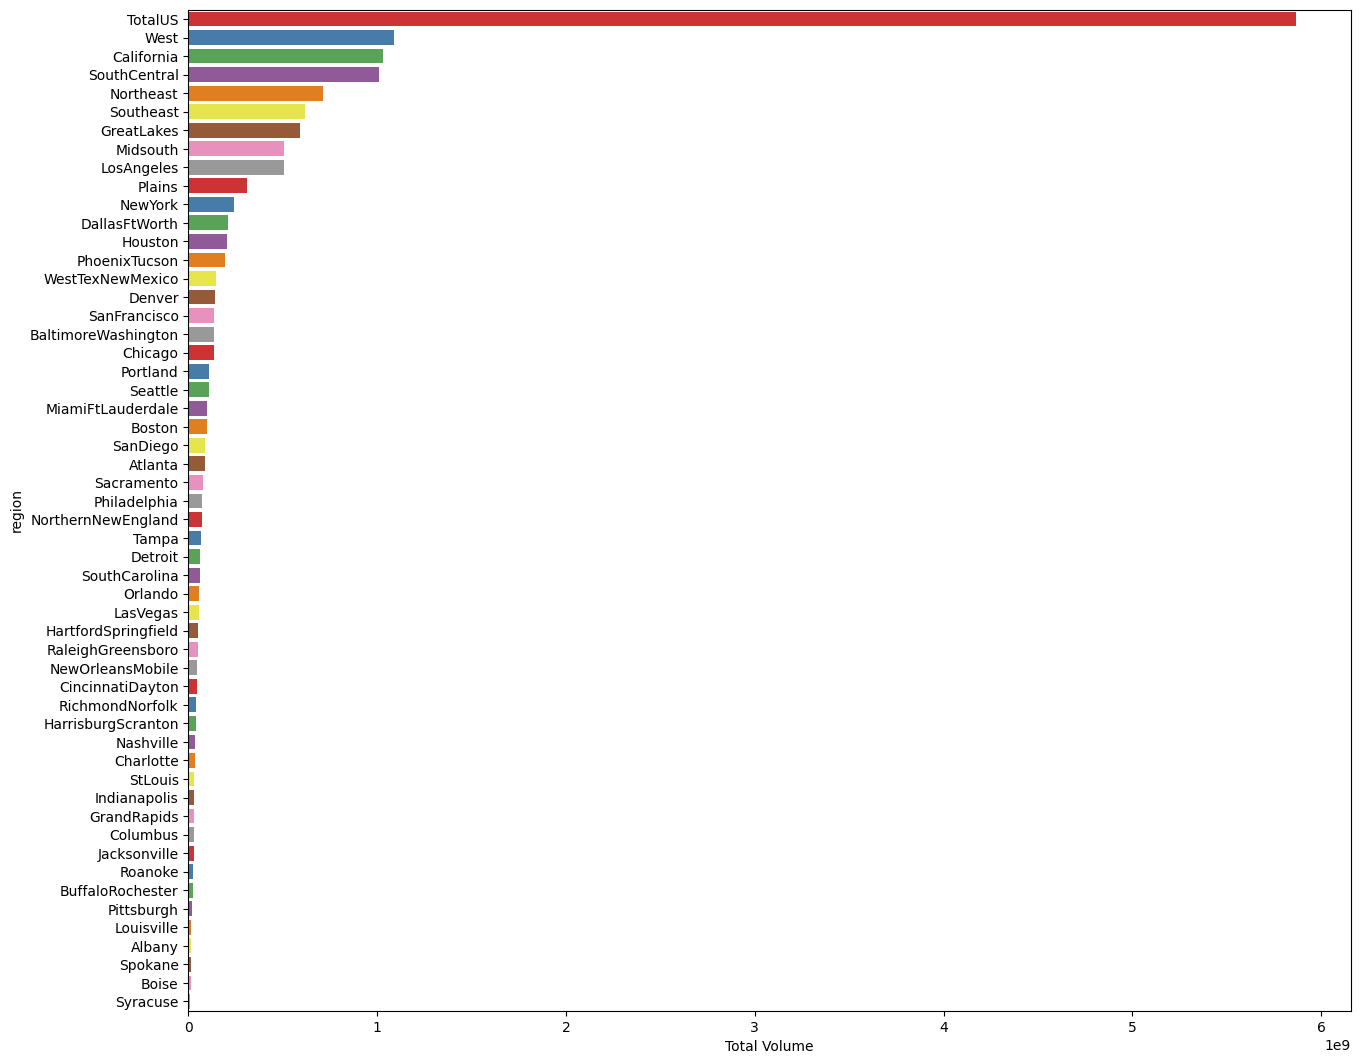

In [ ]:
#Volumatric sales- regionwise
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [ ]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


* **Take-away from feature Region:**

  * ***Maximum*** sales Volume is in ***South Central*** & ***Minimum*** Sales Volume is in ***Syracuse***.
  * ***Maximum Average Price***  is in ***SanFrancisco*** & ***Minimum Average price*** is in **Houston**.

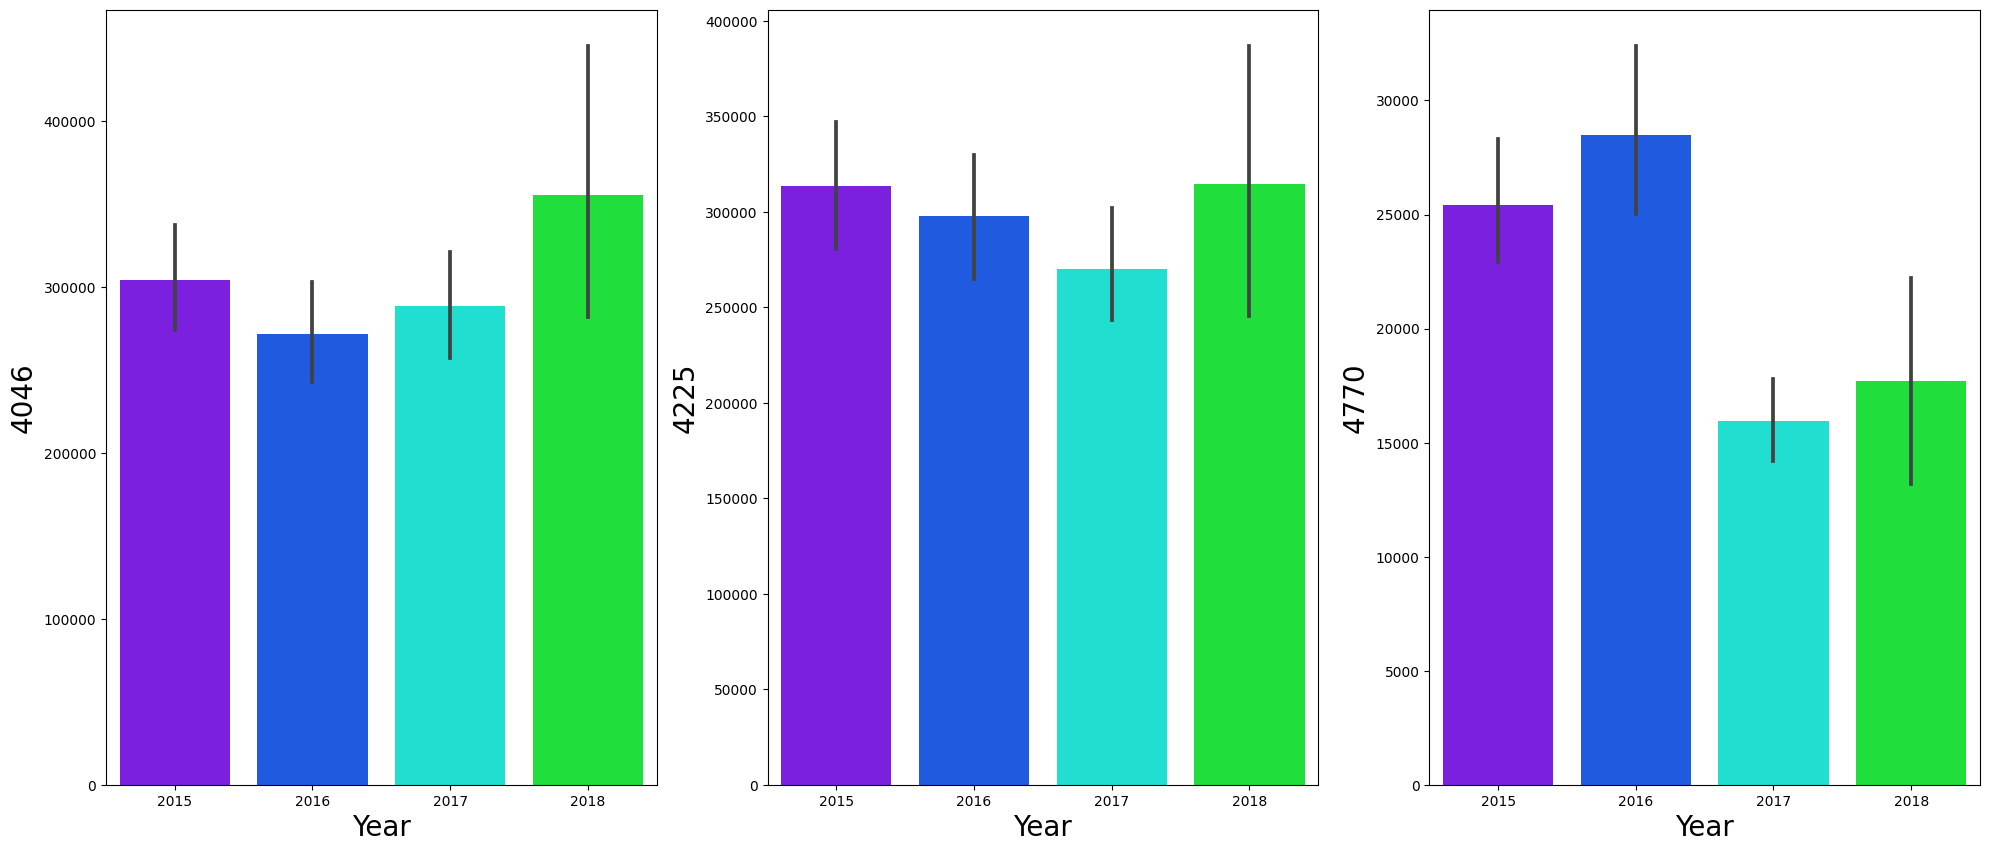

In [ ]:
#'Different PLU produce over the years'
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
Y = df[['4046','4225','4770']]
X = df['year']
for col in Y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=X,y=Y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced.

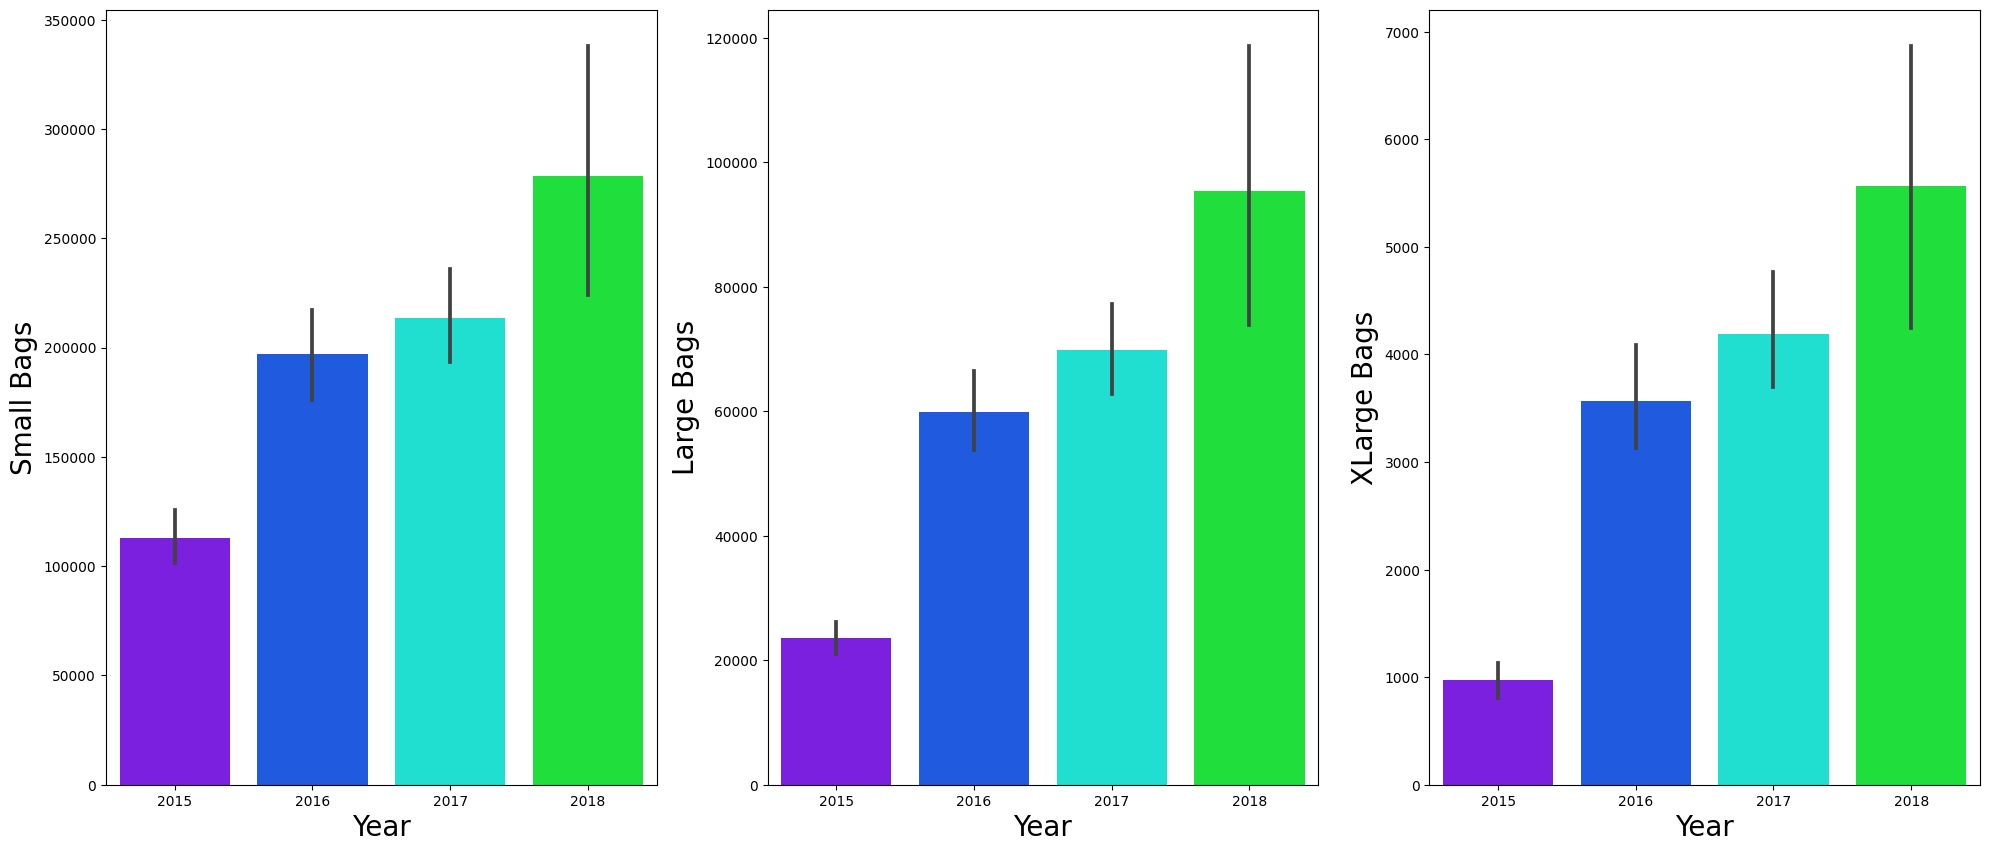

In [ ]:
#'Different types of bagsize sales over the years'
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
Y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in Y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=X,y=Y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* ***Take-away:***

  * Sale of all 3 types of bags has grown over the years.
  * Most of customers prefered to buy Small Bags over Large and Xlarge bags.
  * There is very limited Customers willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

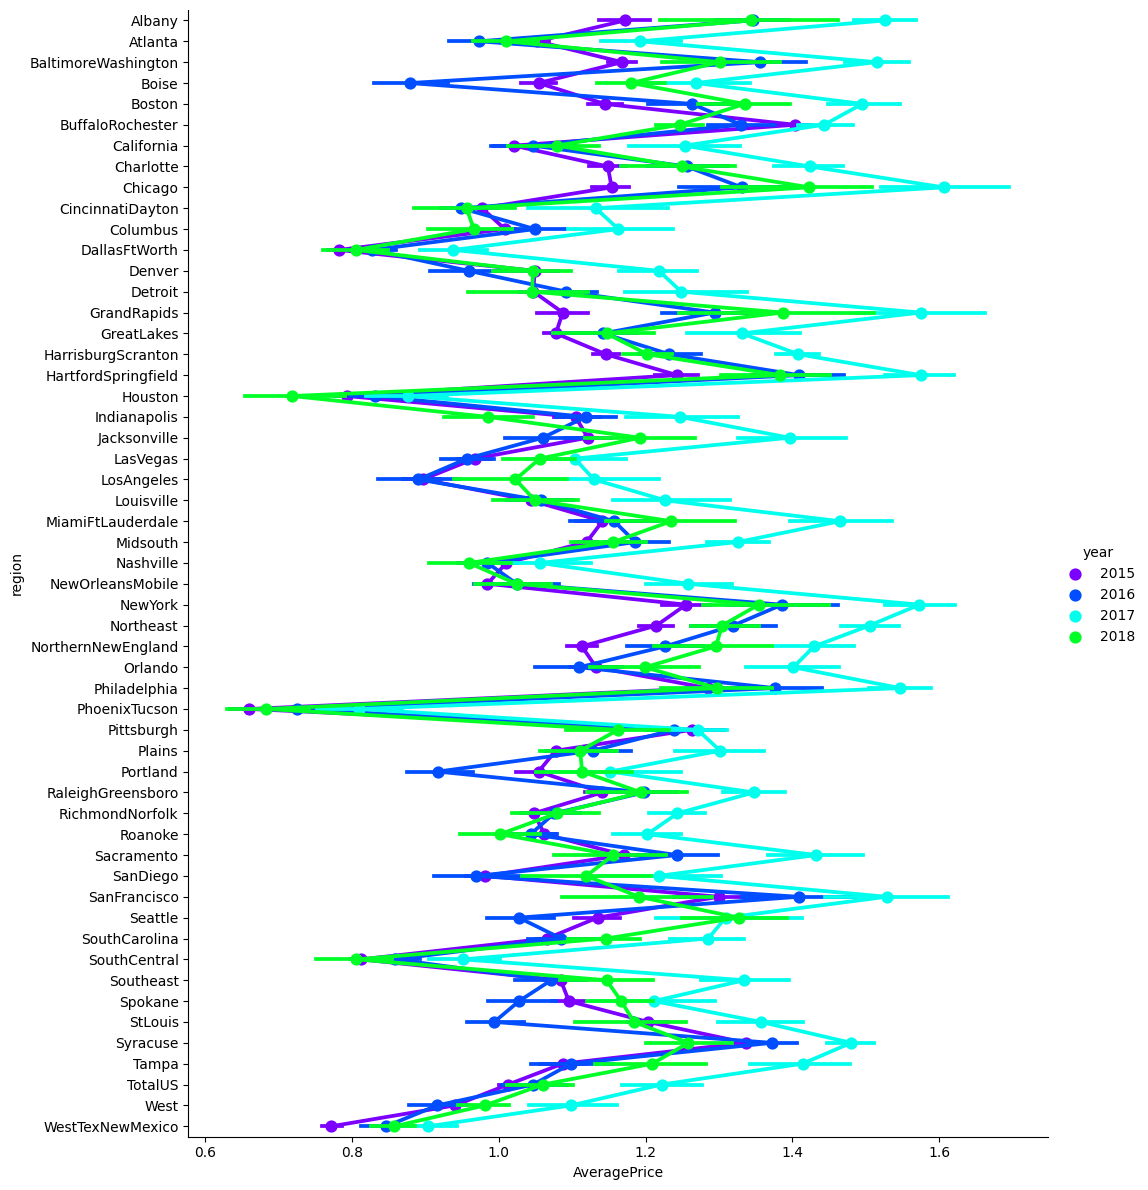

In [ ]:
mask = df['type']=='conventional'
g = sns.catplot(x='AveragePrice',y='region',data=df[mask],hue='year',kind='point',height=12,aspect=0.9)

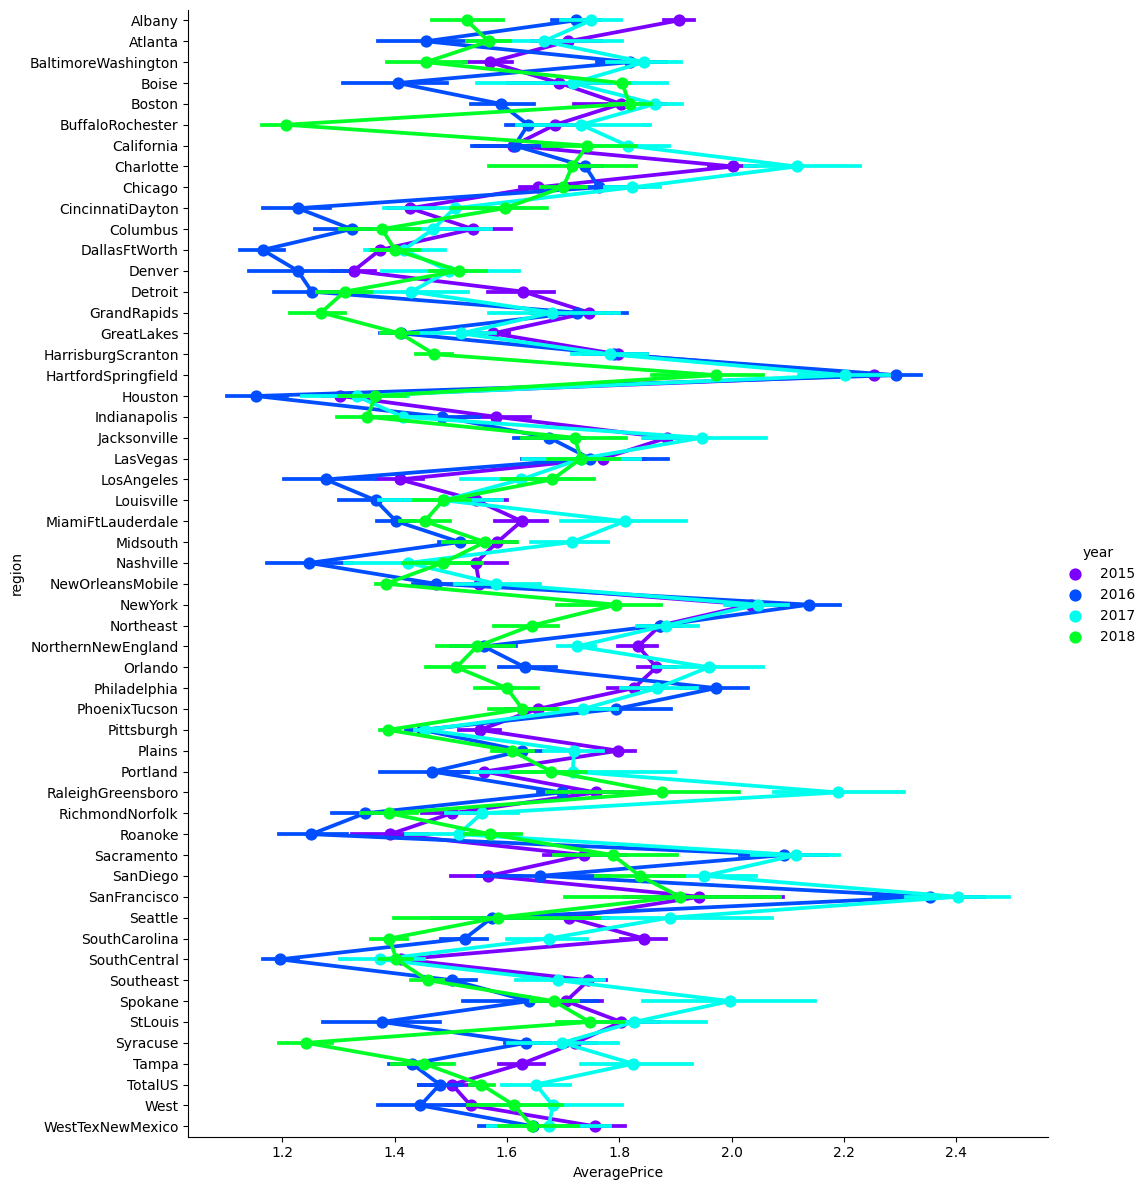

In [ ]:
mask = df['type']=='organic'
g = sns.catplot(x='AveragePrice',y='region',data=df[mask],hue='year',kind='point',height=12,aspect=0.9)

* The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

* ***Pair Plot:***

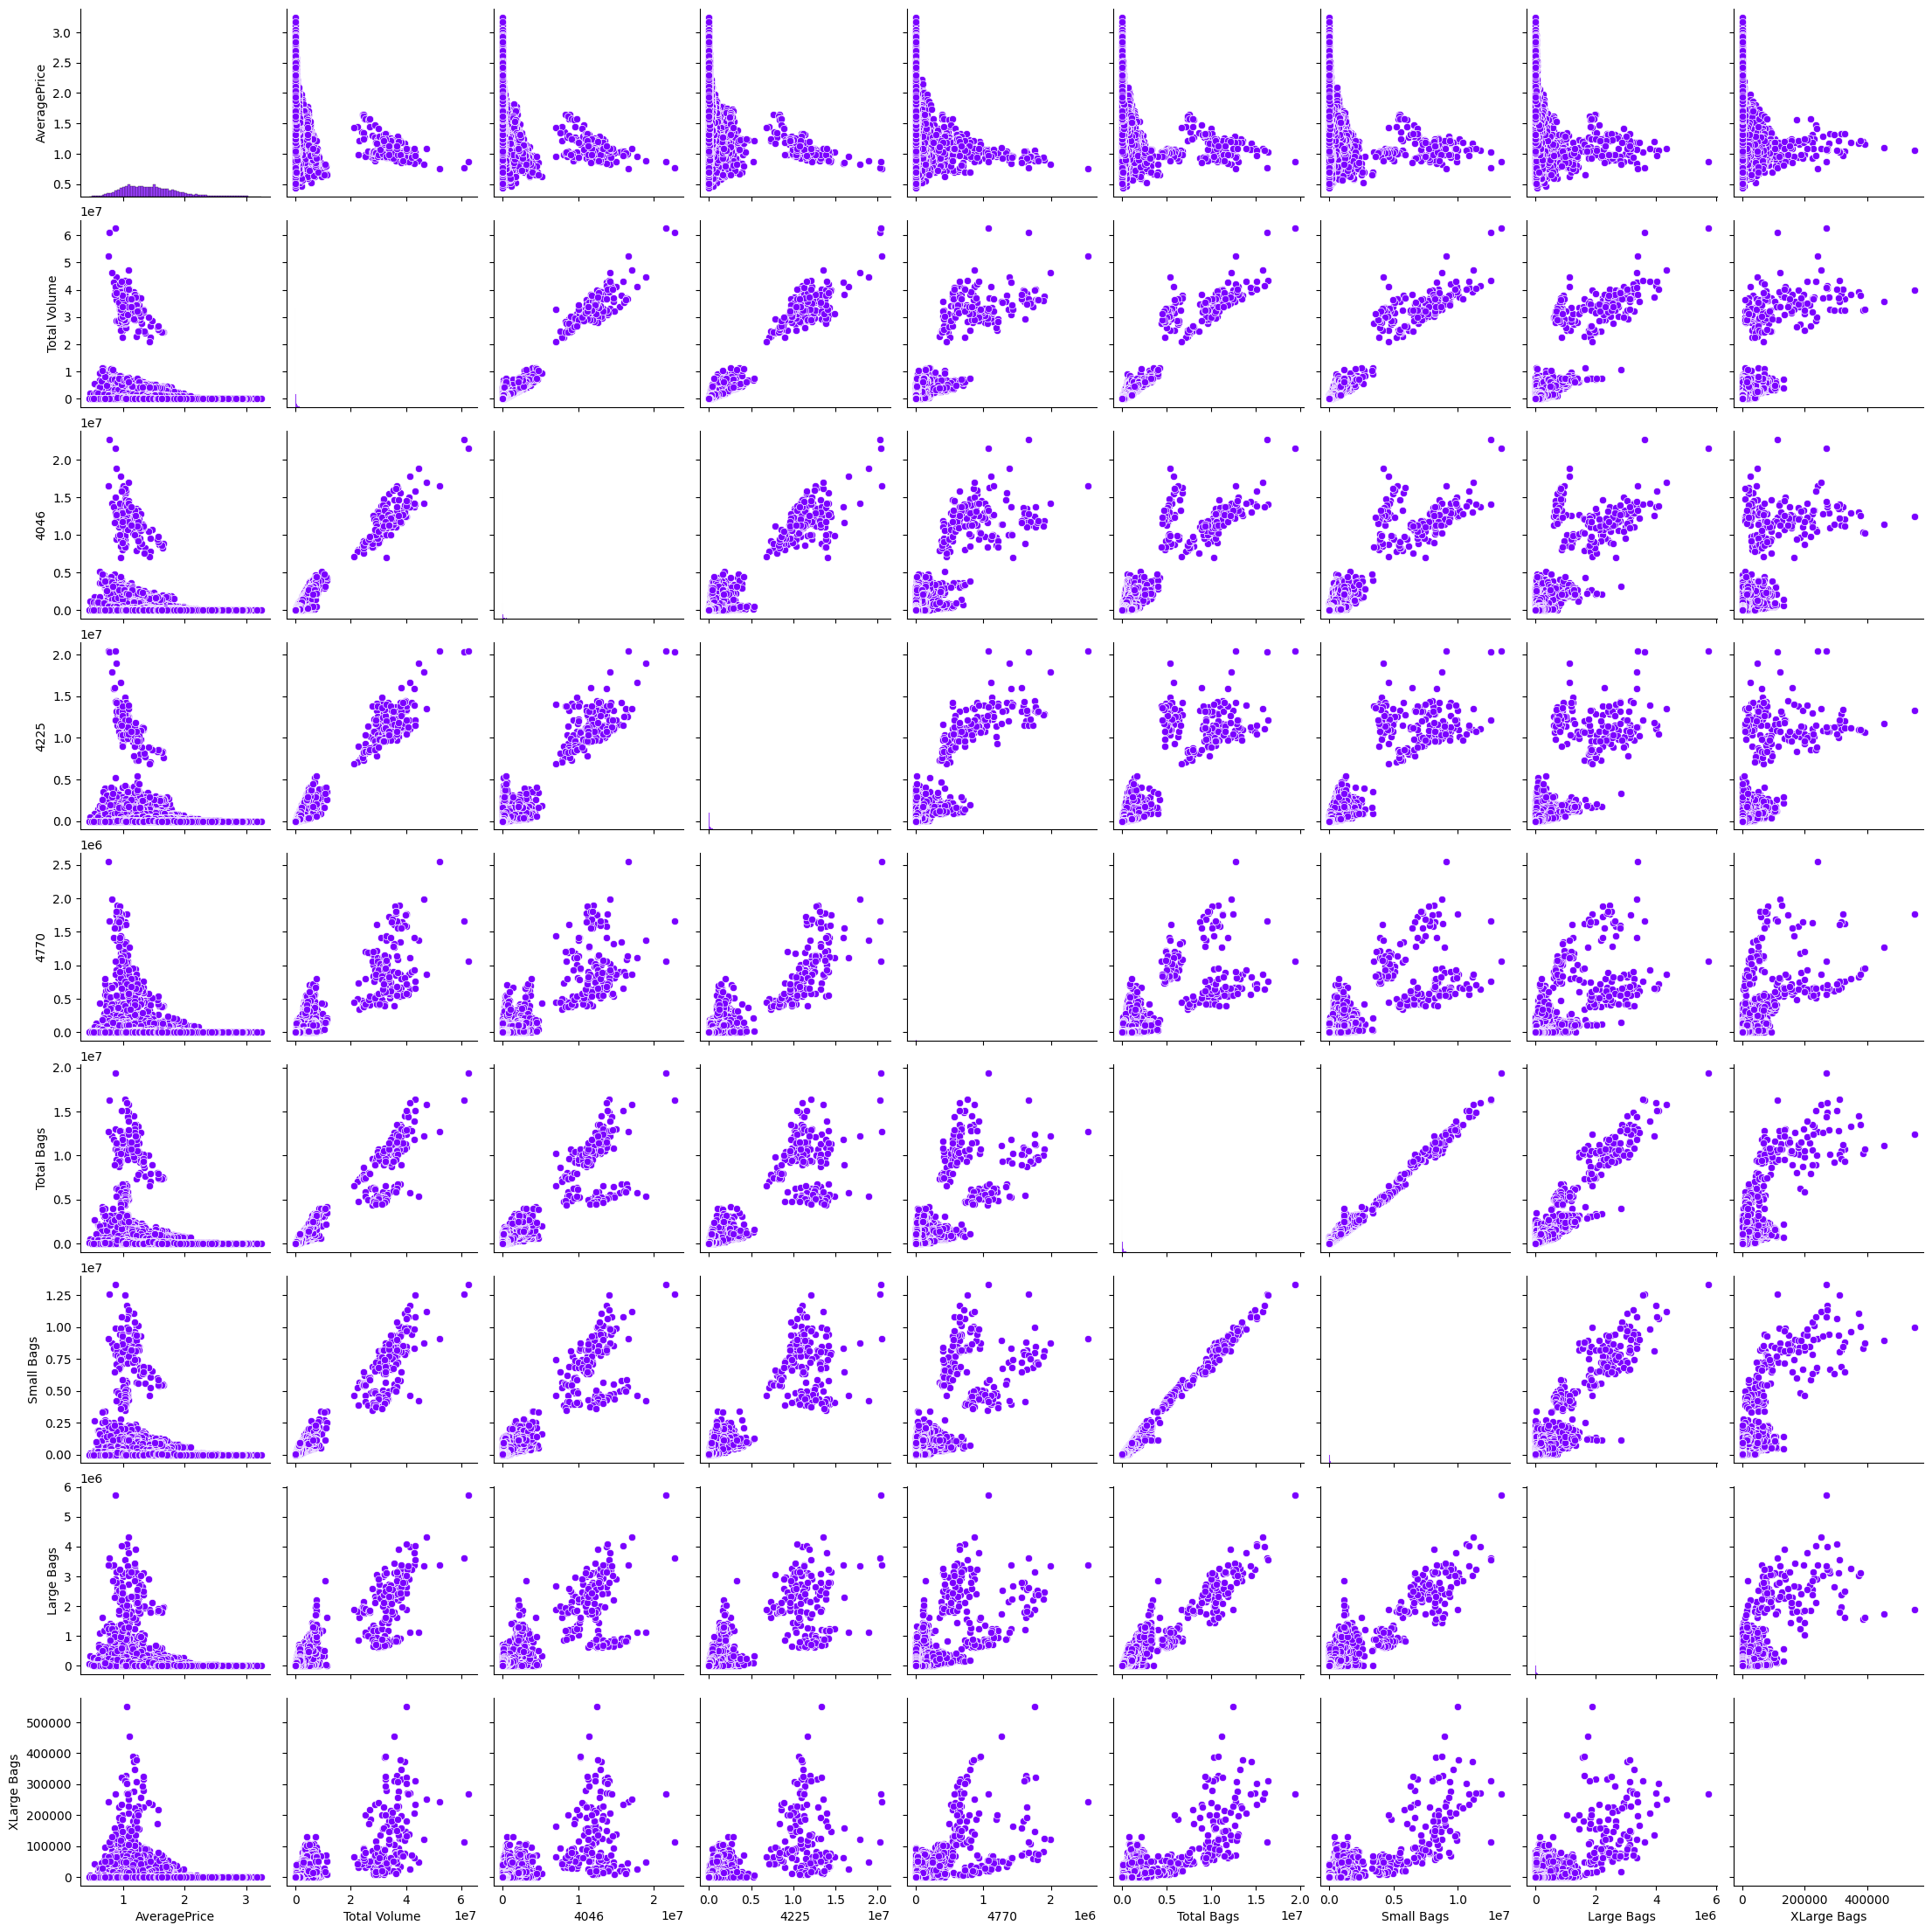

In [ ]:
sns.pairplot(df2)

### **Encoding categorical data:**

In [ ]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


### **Outliers Detection and Removal:**

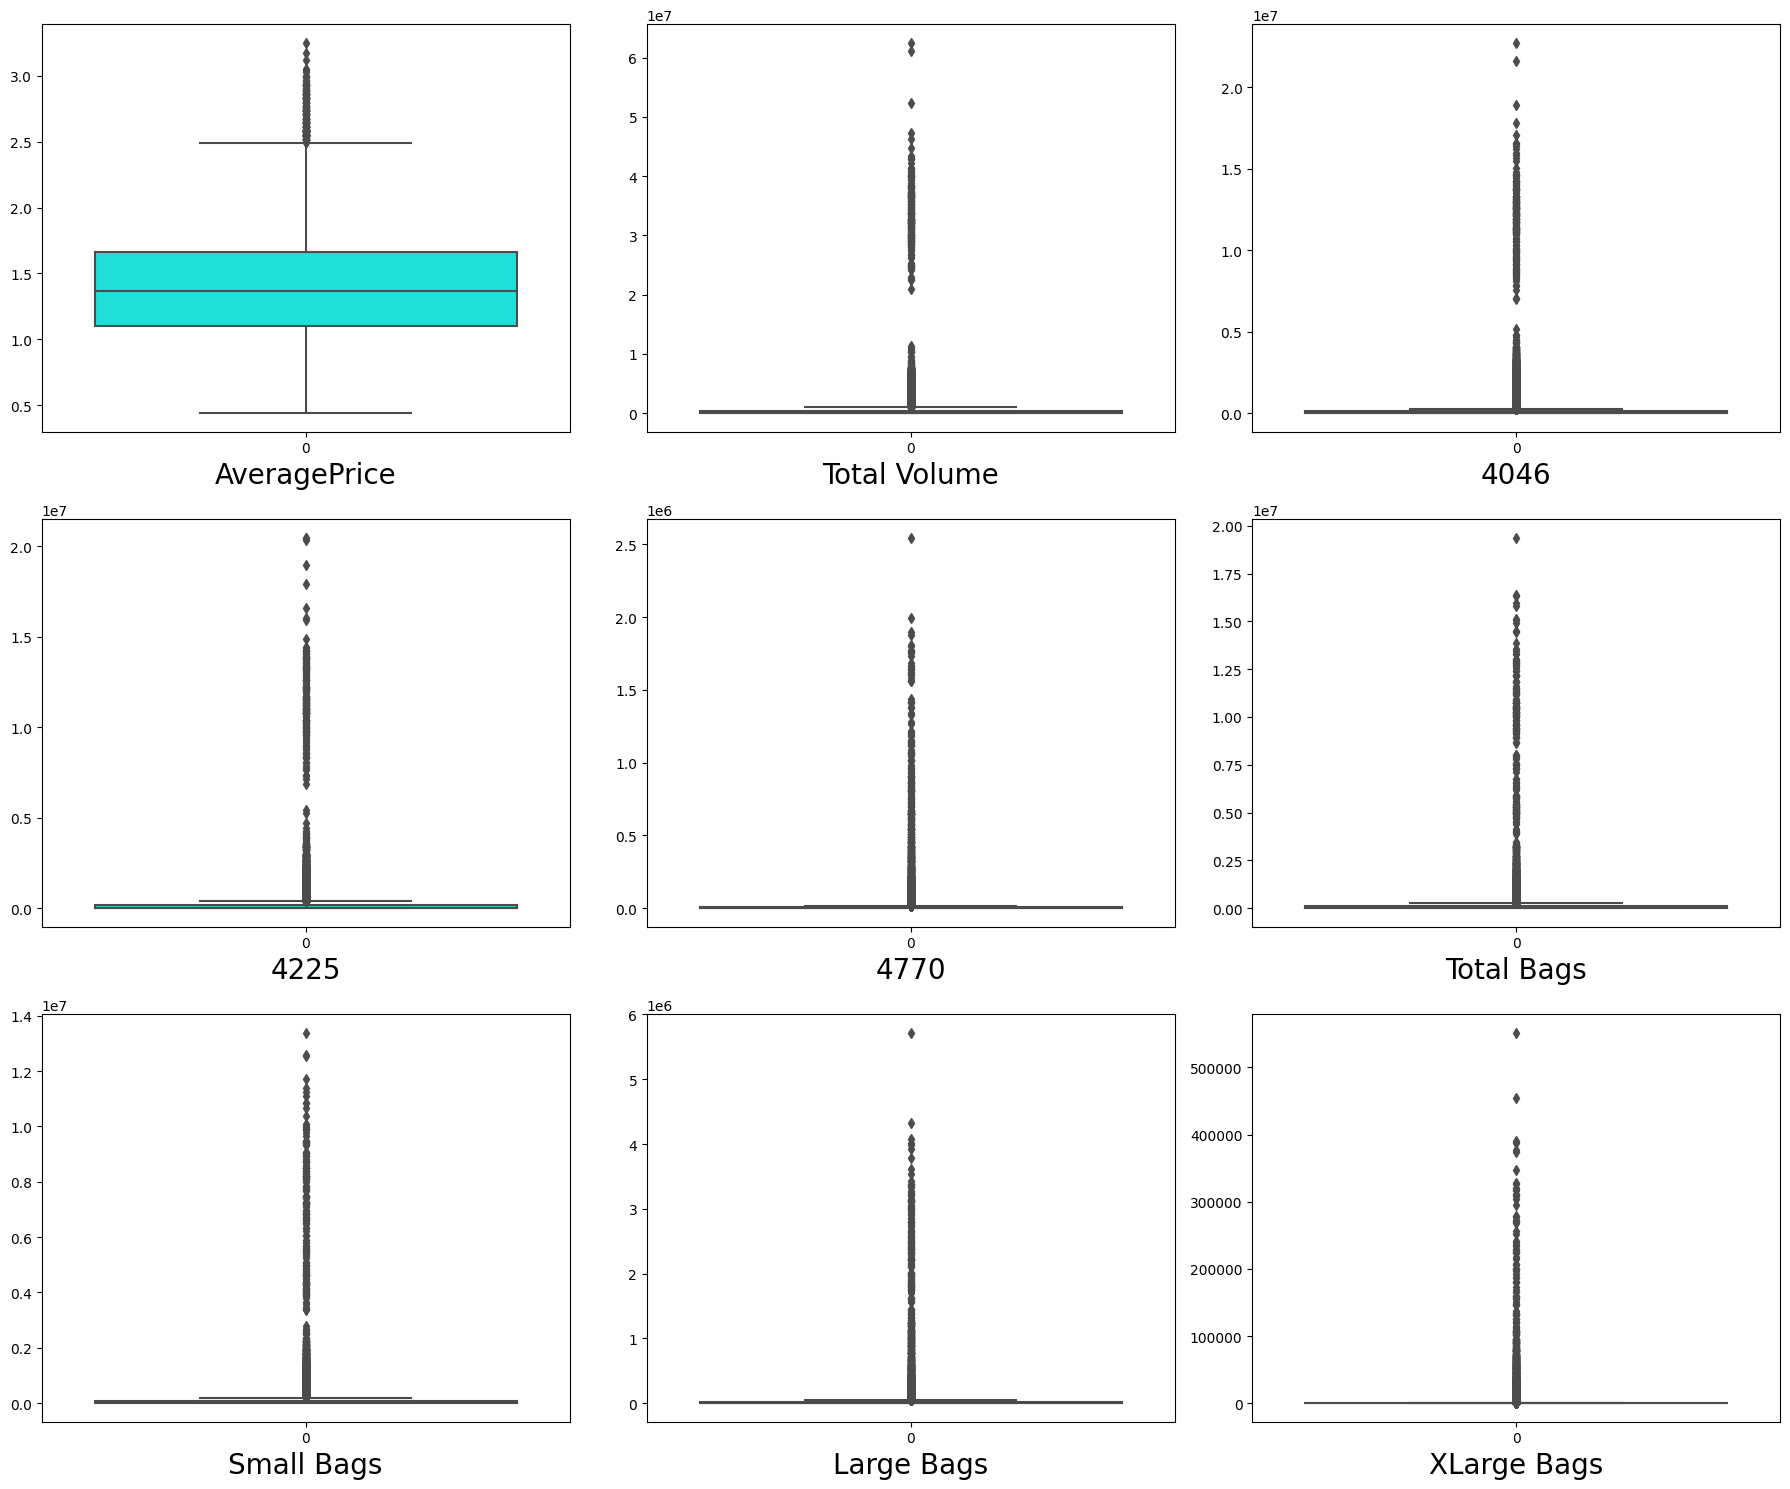

In [ ]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df3:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df3[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [ ]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 13)


In [ ]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


### **Correlation:**

In [ ]:
df4.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.091704,0.149502
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.004866,-0.018645
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.034636,-0.015797
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.040234,-0.019844
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.082054,-0.027245
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.103442,-0.010916
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.086639,-0.013018
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,0.119543,-0.001457
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.108209,0.002843
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409,0.003867,-0.009499


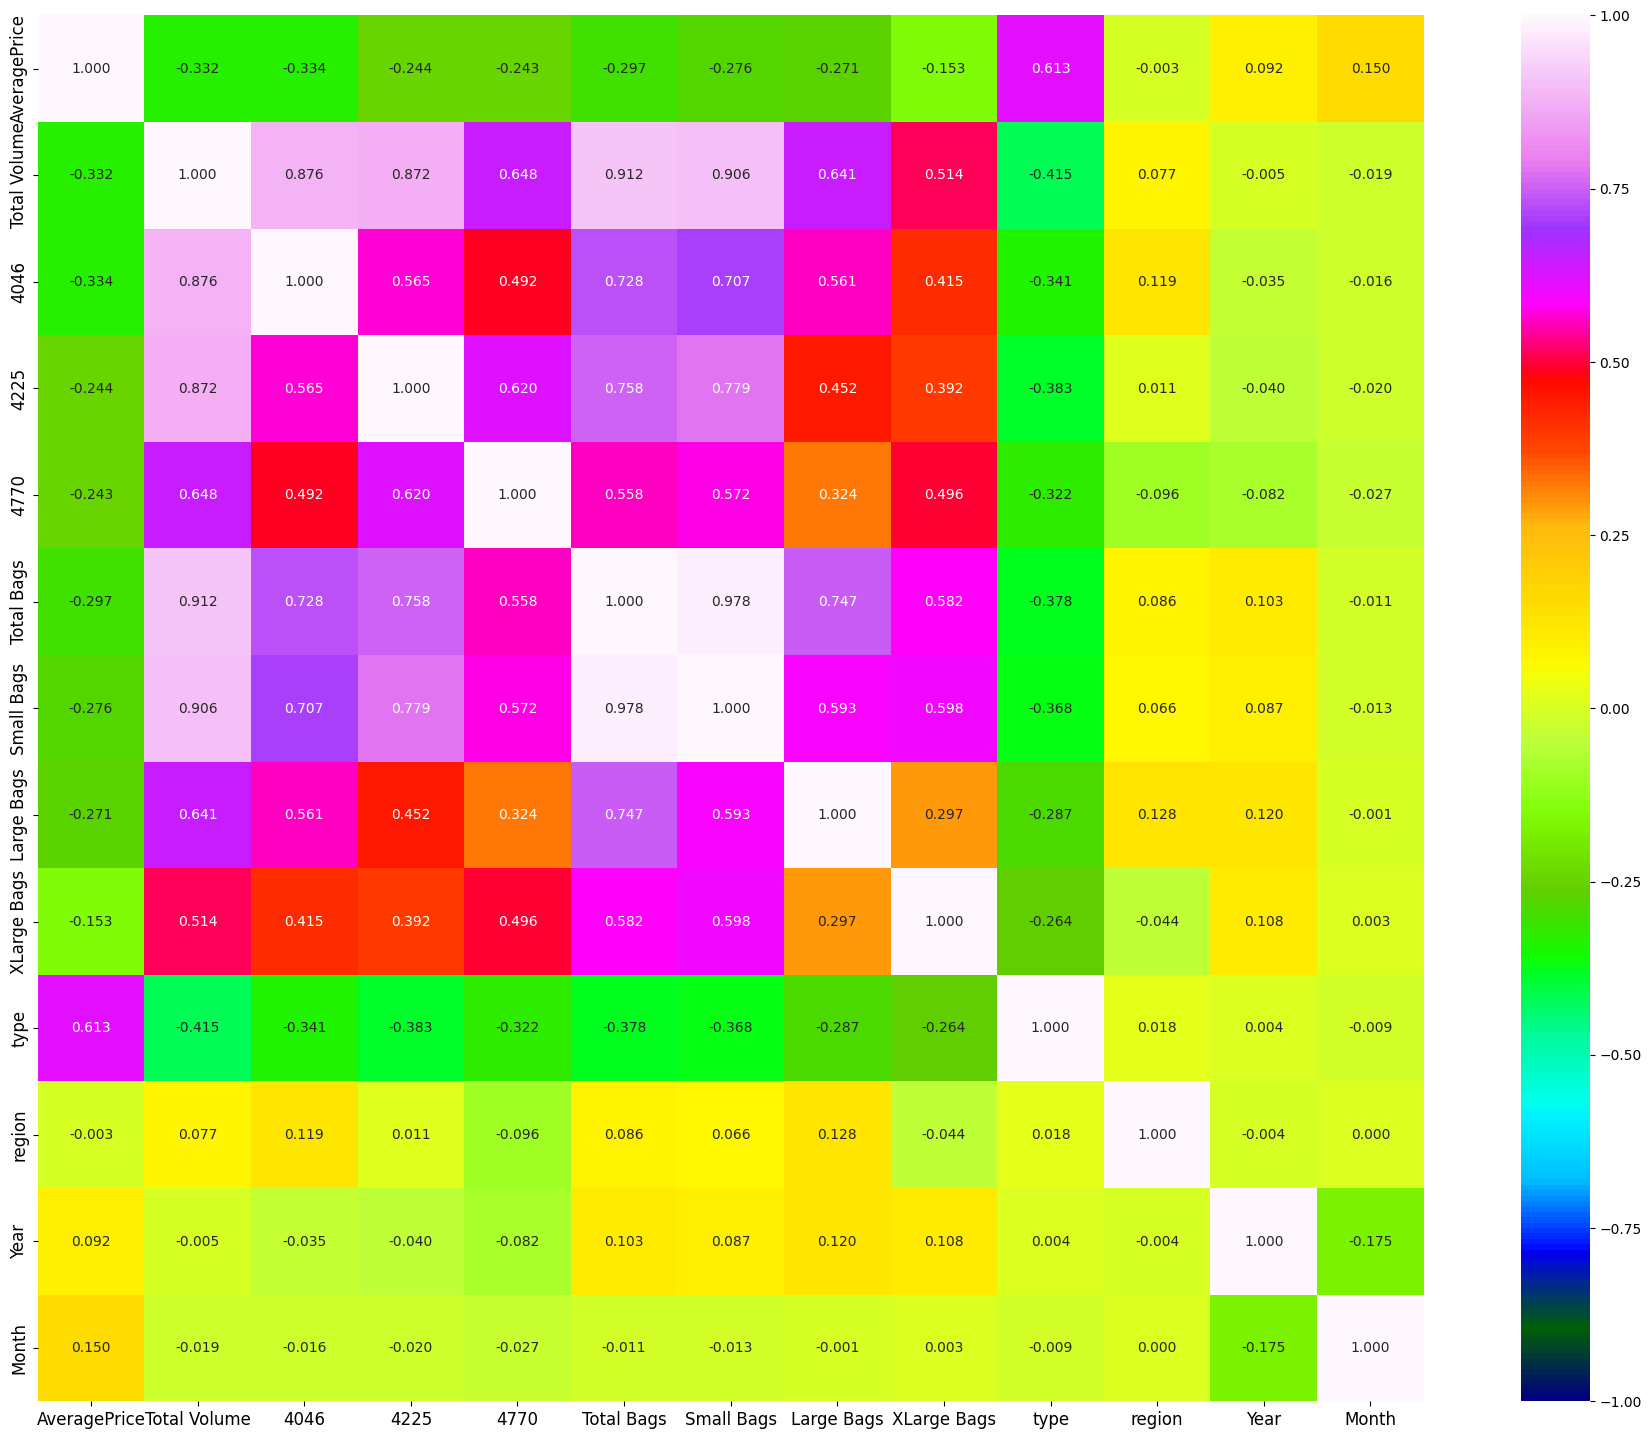

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="gist_ncar")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

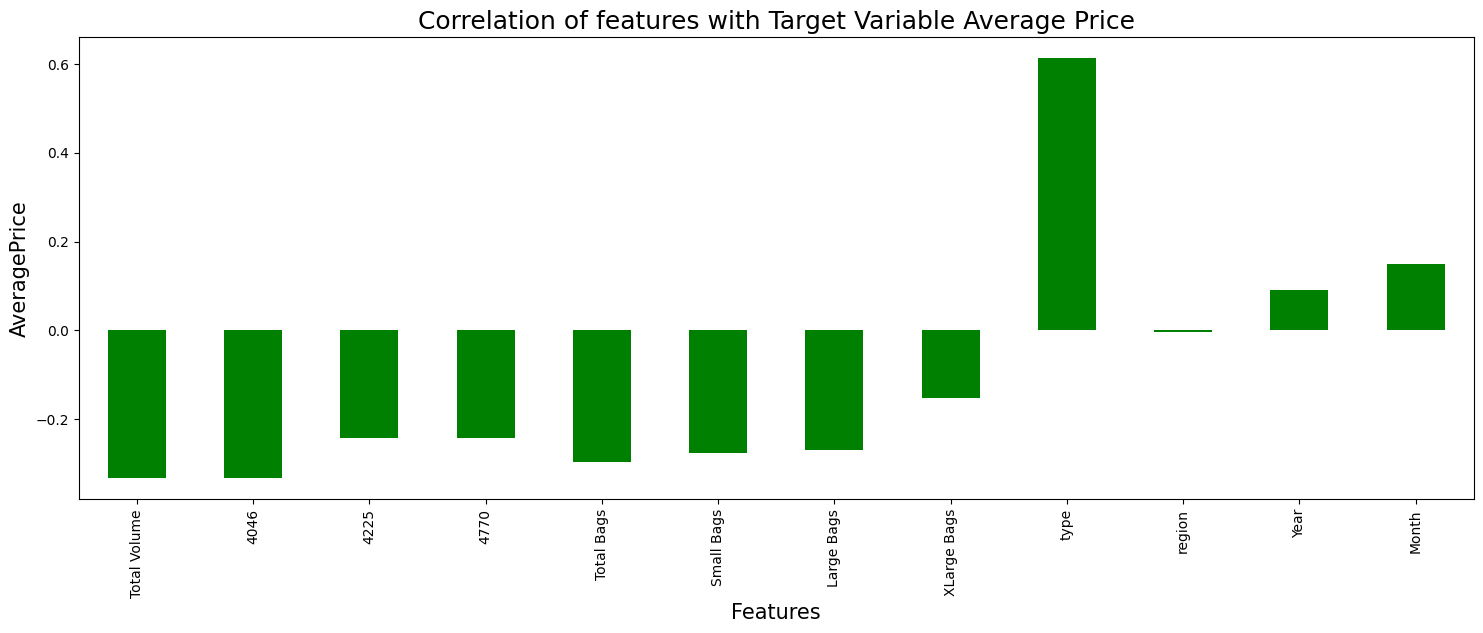

In [ ]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [ ]:
df4.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


<B>Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.</B>

  * Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
  * Total volume is highly correleated to 4046.

* ***Take-away:***

<b> We are going to remove some of columns which are not reqire for further analysis.</b>

  * 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
  * Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
  * Next is region feature, we also going drop this as it very poorly correlated with other features

In [ ]:
df4.drop(columns=['4046','4225','4770','Total Bags'],axis=1, inplace=True)

### **Checking Multicollinearity between features using variance_inflation_factor:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

,VIF,Features
0,24.367452,AveragePrice
1,7.755253,Total Volume
2,7.710569,Small Bags
3,1.989702,Large Bags
4,1.707744,XLarge Bags
5,3.649631,type
6,3.986715,region
7,22.370327,Year
8,4.212273,Month


<b> Strategy to Address Multicollinearity :</b>

  1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
  2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.
  
<b> We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.</b>

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [ ]:
df4.drop(columns=['Year'],axis=1, inplace=True)

**Checking correlation with target variable after removal of multicollinearity:**

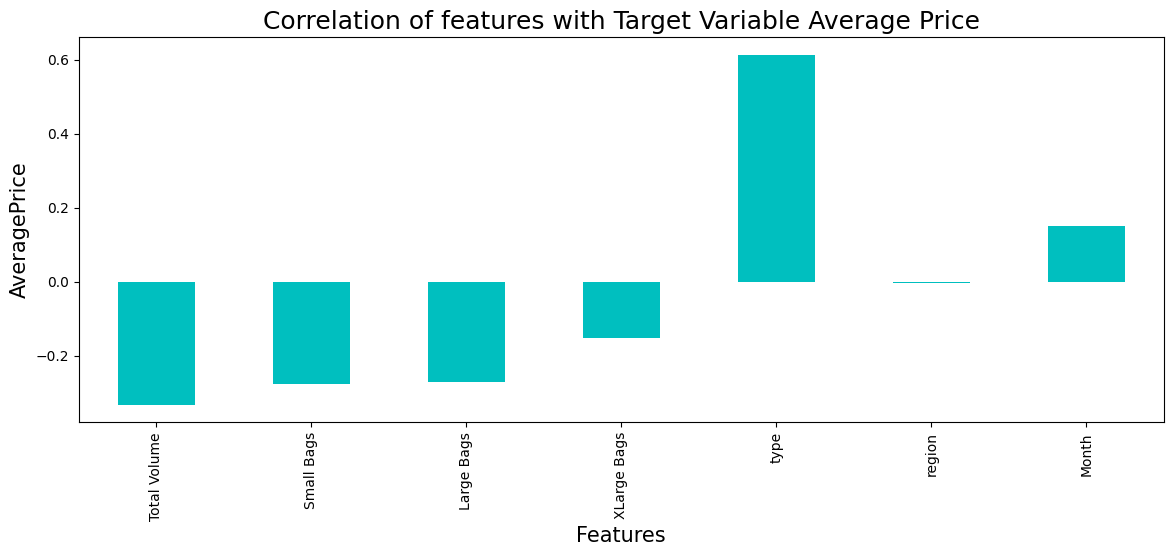

In [ ]:
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()


* ***Skewness of features:***

In [ ]:
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Month           0.107408
dtype: float64

**Transforming skewness through log transform--**

In [ ]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

In [ ]:
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

**Standard Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### ***Machine Learning Model:***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 7)
Training target vector size: (11826,)
Test feature matrix size: (5825, 7)
Test target vector size: (5825,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46992884149139635 on Random_state 557


### **Linear Regression :**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.09411981 1.23129101 1.61375155 ... 1.71664374 1.65694467 1.64125986]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


**Linear Regression Evaluation Matrix---**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.2242278055983644
Mean squared error : 0.0808329709771298
Root Mean Squared Error: 0.28431139790224697


 R2 Score :
0.4699288414913964


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.023797087657453565


**Applying other Regression Model, Evaluation & Crossvalidation---**

In [ ]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.11945959430718761
Mean squared error : 0.027780497864036226
Root Mean Squared Error: 0.16667482672568232


 R2 Score :
0.8178263088845044


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.2242278147925453
Mean squared error : 0.08083297650320312
Root Mean Squared Error: 0.2843114076205932


 R2 Score :
0.4699288052535586


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.15336824034334762
Mean squared error : 0.05411696137339057
Root Mean Squared Error: 0.23263052545483057


 R2 Score :
0.6451220329601071


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.21977440272590168
Mean squared error : 0.07608413350172814
Root Mean Squared Error: 0.27583352497788977


 R2 Score :
0.5010698691157234


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.14817439540253743
Mean squared error : 0.050802178117630645
Root Mean Squared Error: 0

In [ ]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.06347400296028782


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.023797172296218937


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.5425118865832794


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.05300601007067278


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.4617735296676348


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_one

* Among all Model Random Forest Regressor gave us maximum R2 score of 0.8190 and minimum RMSE value of 0.16613

So We will perform Hyper Parameter Tuning on Random Forest Regressor---

### ***Hyper Parameter Tuning : GridSearchCV***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
parameter = {'n_estimators':[10,40,70],'max_depth': [10,20,30],'min_samples_leaf':[5,10],'criterion':['squared_error'],'max_features':["sqrt"]}

In [ ]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 20, 30], 'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [10, 40, 70]},
             verbose=3)

### **Final Model:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'squared_error', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 0.13027789120774574
Mean squared error : 0.0317791340239218
Root Mean Squared Error: 0.17826703010910852


 R2 Score of Final Model :
0.7916048094628805




 True Values Vs Predicted Value plot :


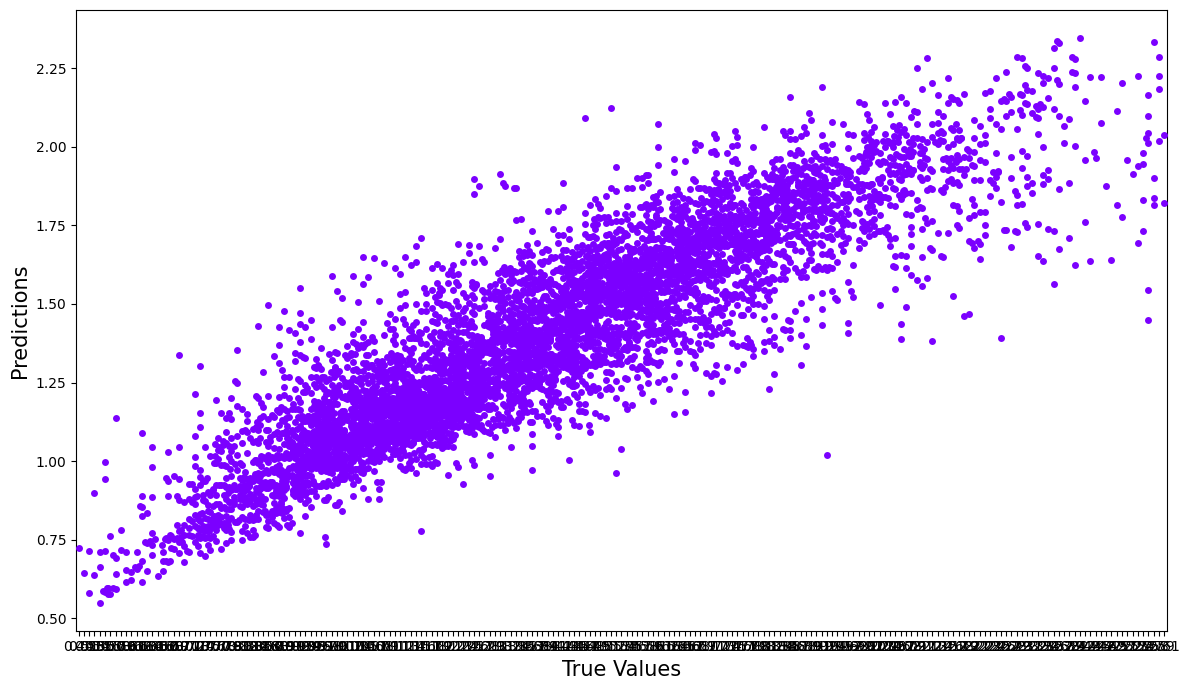

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test,y= y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### **Saving Model:**

In [ ]:
import joblib
joblib.dump(Final_mod,'Avocado_project_Final.pkl')

['Avocado_project_Final.pkl']

***This concludes the Baseball Case Study evaluation project***



             ------------------------------------------------------------------------The End-----------------------------------------------------------------------